In [310]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [311]:
df_data_2d = pd.read_csv('data/data_2d.csv')
df_mnist = pd.read_csv('data/mnist.csv')

In [312]:
X_data_2d = df_data_2d.iloc[: , 1:]

In [313]:
sse_data = []
k_range_data = range(1, 21)
for k in k_range_data:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_data_2d)
    sse_data.append(kmeans.inertia_)

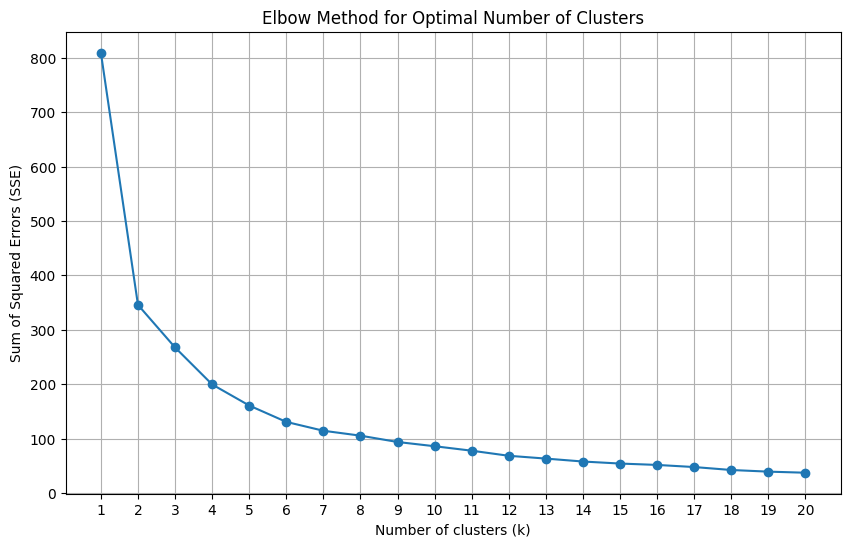

In [314]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_data, sse_data, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range_data)
plt.grid(True)
plt.show()

In [315]:
sse_mnist = []
k_range_mnist = range(1, 21)
for k in k_range_mnist:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mnist)
    sse_mnist.append(kmeans.inertia_)

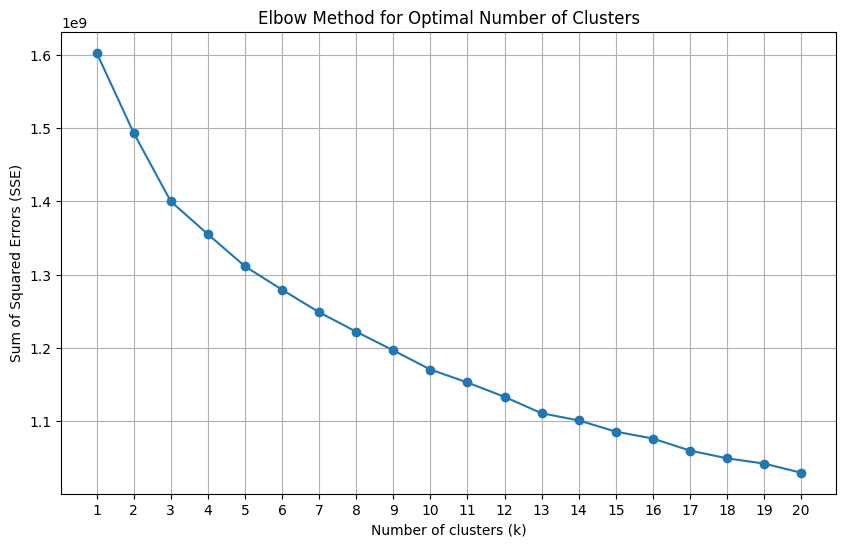

In [316]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_mnist, sse_mnist, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range_mnist)
plt.grid(True)
plt.show()

In [317]:
pca = PCA(n_components=2)
pca_mnist = pca.fit_transform(df_mnist)

In [318]:
sse_mnist_with_pca = []
k_range_mnist_with_pca = range(1, 21)
for k in k_range_mnist:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_mnist)
    sse_mnist_with_pca.append(kmeans.inertia_)

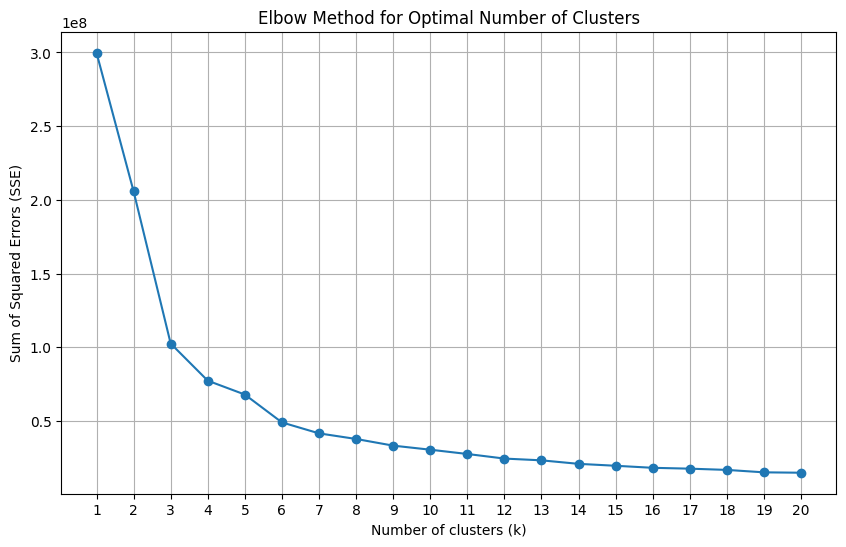

In [319]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_mnist_with_pca, sse_mnist_with_pca, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range_mnist_with_pca)
plt.grid(True)
plt.show()